In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [8]:
bank_data_loc = os.path.join('data' , 'bank-additional','bank-additional-full.csv')

In [10]:
bank_data = pd.read_csv(bank_data_loc , sep=";")

In [11]:
bank_data.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


# Exploring the data 

### Analyze the distribution of the numerical features

In [12]:
# define numerical features
numerical_features = [col for col in bank_data.columns \
                      if np.issubdtype(bank_data[col]\
                            .dtype, np.number)]

In [22]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [23]:
bank_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


C:\Users\Mostafa.A.Gadalla\AppData\Local\Temp\ipykernel_7112\3521492161.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col])
C:\Users\Mostafa.A.Gadalla\AppData\Local\Temp\ipykernel_7112\3521492161.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank_data[col])
C:\Users\Mostafa

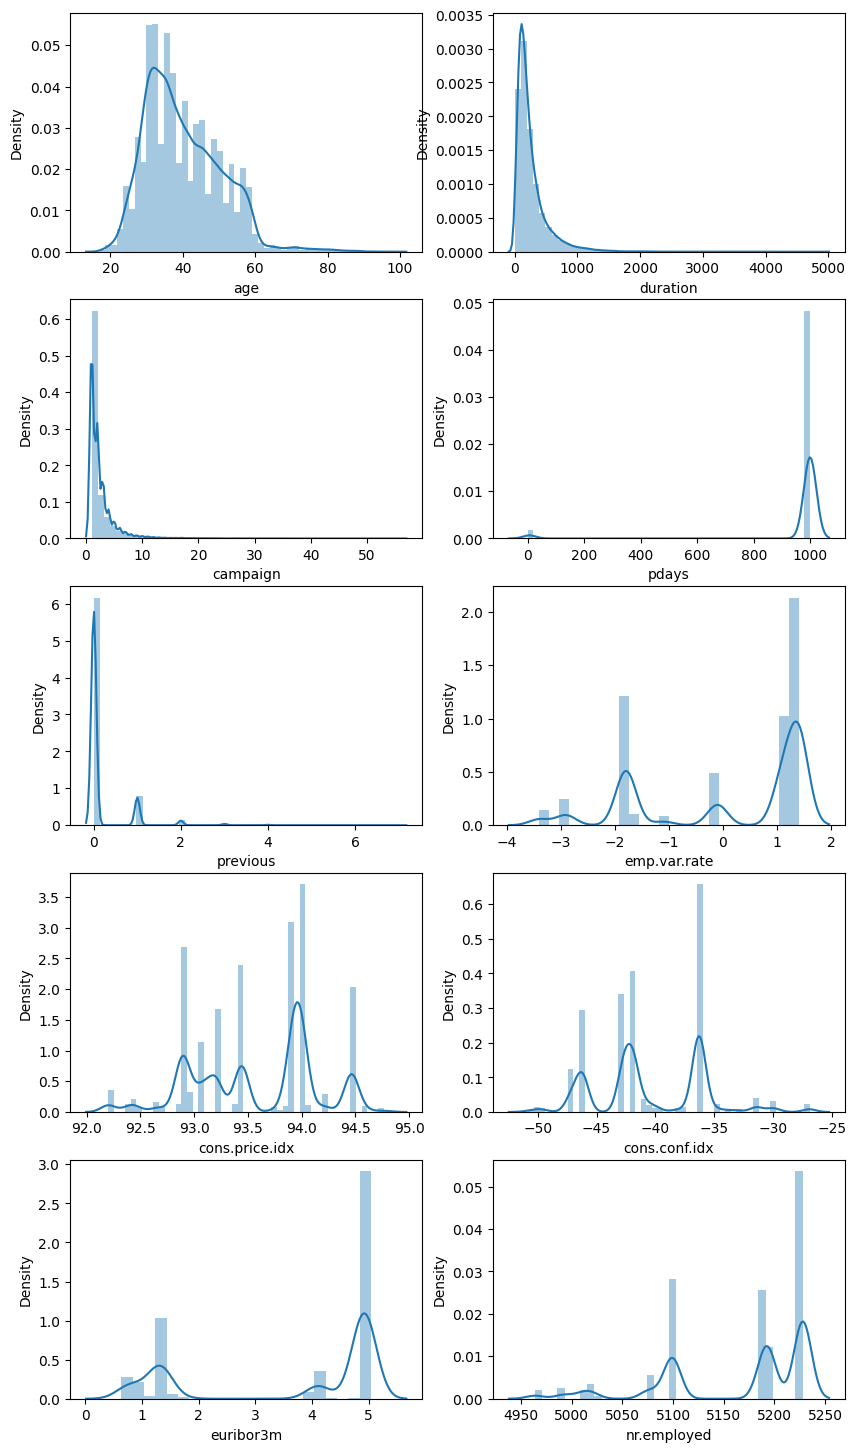

In [26]:
# plot distributions of numerical features
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.distplot(bank_data[col])

### Analyze distribution of categorical features

In [32]:
categorical_features = [ col for col in bank_data.columns \
    if pd.api.types.is_string_dtype(bank_data[col])
]

In [33]:
bank_data[categorical_features].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


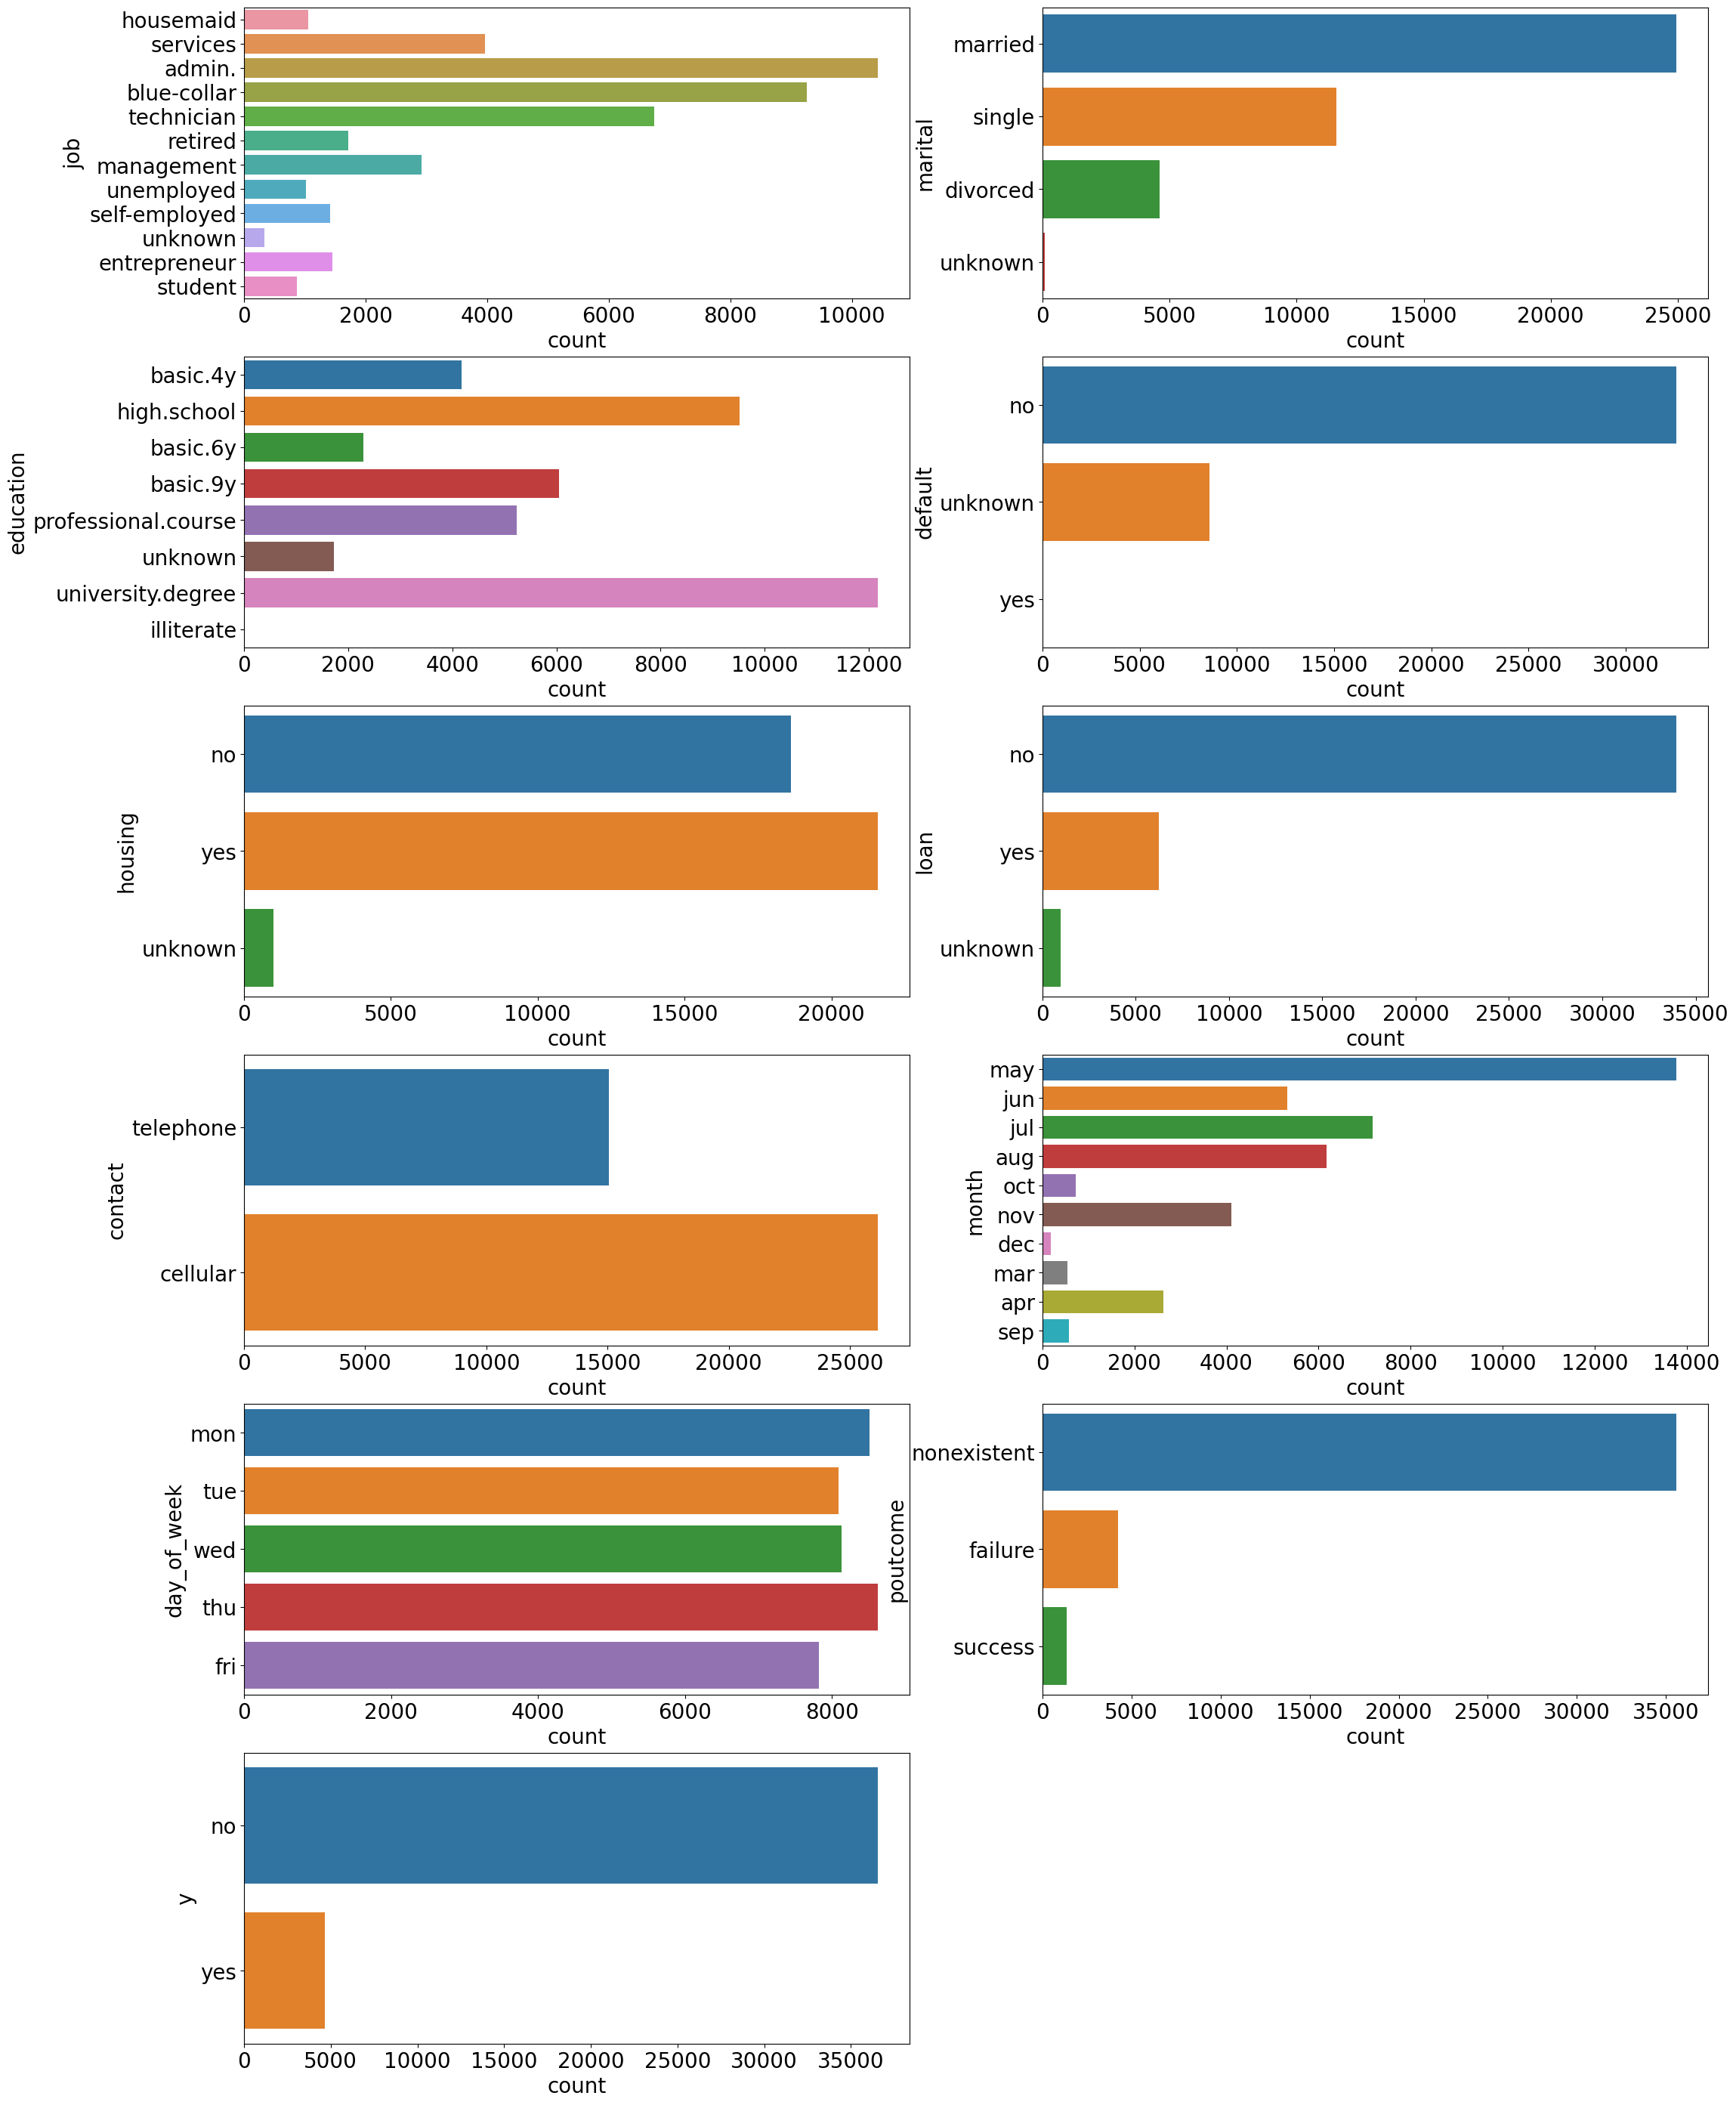

In [40]:
plt.figure(figsize=(25,35))
for index , col in enumerate(categorical_features):
    plt.subplot(6,2,index+1)
    ax = sns.countplot(y=col , data=bank_data)
    ax.set_xlabel("count", fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    ax.tick_params(labelsize=20)

In [41]:
# compute number of entries in y column
print("Total number of entries:")
print(bank_data["y"].value_counts(ascending=True))
print()
print("Percentages:")
print(bank_data["y"].value_counts(normalize=True, \
                                  ascending=True)*100)

Total number of entries:
y
yes     4640
no     36548
Name: count, dtype: int64

Percentages:
y
yes    11.265417
no     88.734583
Name: proportion, dtype: float64


### Impact of numerical features on outcome
#####  Is there a statistically 
significant difference in numerical features for successful and non-successful
marketing campaigns?

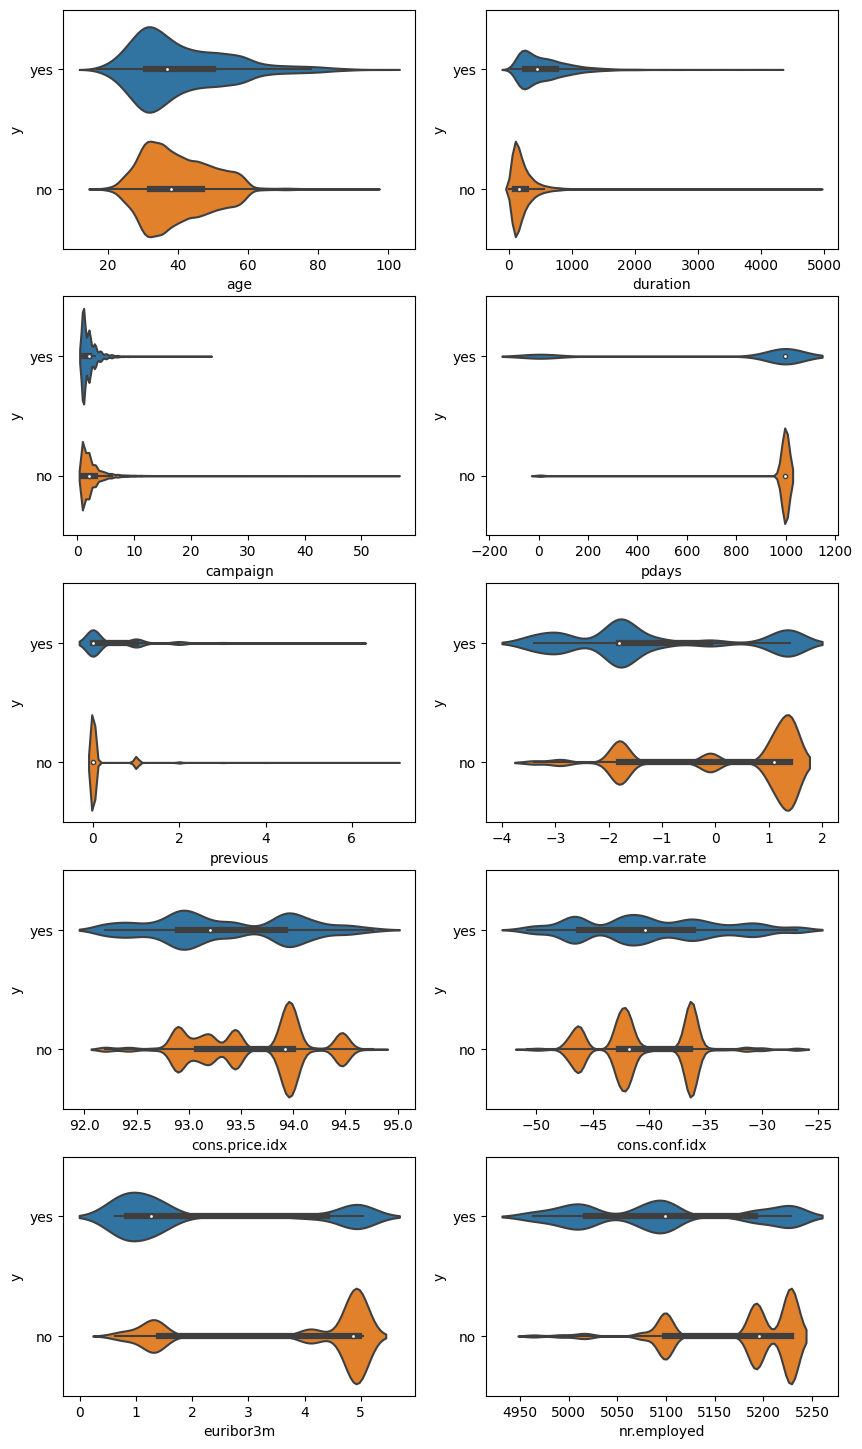

In [44]:
"""
create violin plots for successful and non-successful marketing campaigns
"""
plt.figure(figsize=(10,18))
for index, col in enumerate(numerical_features):
    plt.subplot(5, 2, index+1)
    sns.violinplot(x=col, y="y", data=bank_data, \
                   order=["yes", "no"])

## Hypothesis testing

### running a hypothesis test 
on each of the numerical features, in which we will test whether the average value of
the respective numerical feature is different for

In [47]:
from scipy.stats import ttest_ind

In [51]:
bank_data["age"][bank_data["y"] == "yes"]

75       41
83       49
88       49
129      41
139      45
         ..
41174    62
41178    62
41181    37
41183    73
41186    44
Name: age, Length: 4640, dtype: int64

In [56]:
def test_means(data,col):
    yes_cond = data["y"] == "yes"
    values_yes = data[col][yes_cond]
    values_no = data[col][~yes_cond]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()
    ttest_res = ttest_ind(values_yes, values_no)
    return [col, mean_yes, mean_no, \
            round(ttest_res[0], 4), round(ttest_res[1],4)]

In [58]:
# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "mean yes", \
                                "mean no", "ttest stat", \
                            "ttest pval"])
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(bank_data, col)
test_df

,column,mean yes,mean no,ttest stat,ttest pval
0,age,40.913147,39.911185,6.1721,0.0
1,duration,553.191164,220.844807,89.9672,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0
4,previous,0.492672,0.132374,48.0027,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0


As we can see from the previous plot, there is a statistically significant difference in 
the mean values for each of the numerical columns (the results from the p-value in 
the ttest pval column). This means that for each of the numerical features, the 
average value for successful marketing campaigns is significantly different than the 
average value for unsuccessful marketing campaigns.

#### Testing the difference in distributions

In [59]:
from scipy.stats import ks_2samp

In [60]:
"""
define function which performs Kolmogorov-Smirnov test, 
for provided column
"""
def test_ks(data, col):
    yes_mask = data["y"] == "yes"
    values_yes = data[col][yes_mask]
    values_no = data[col][~yes_mask]
    kstest_res = ks_2samp(values_yes, values_no)
    return [col, round(kstest_res[0], 4), \
            round(kstest_res[1],4)]

In [62]:
# define pandas dataframe, in which values should be filled
test_df = pd.DataFrame(columns=["column", "ks stat", "ks pval"])
"""
for each column in the numerical_features,
compute test statistics and fill the values in the dataframe
"""
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(bank_data, col)
test_df

,column,ks stat,ks pval
0,age,0.0861,0.0
1,duration,0.4641,0.0
2,campaign,0.0808,0.0
3,pdays,0.1934,0.0
4,previous,0.2102,0.0
5,emp.var.rate,0.4324,0.0
6,cons.price.idx,0.2281,0.0
7,cons.conf.idx,0.1998,0.0
8,euribor3m,0.4326,0.0
9,nr.employed,0.4324,0.0


From the preceding figure, we can also observe that the distributions of the 
various numerical features present a significant difference between successful and 
unsuccessful marketing campaigns.

## differences between campaign related features and financial features

In [63]:
# create arrays containing campaign and financial columns
campaign_columns = ["age", "duration", "campaign", "previous"]
financial_columns = ["emp.var.rate", "cons.price.idx", \
                     "cons.conf.idx", "euribor3m"]

E:\projects\Bank_marketing_campaign\bank_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

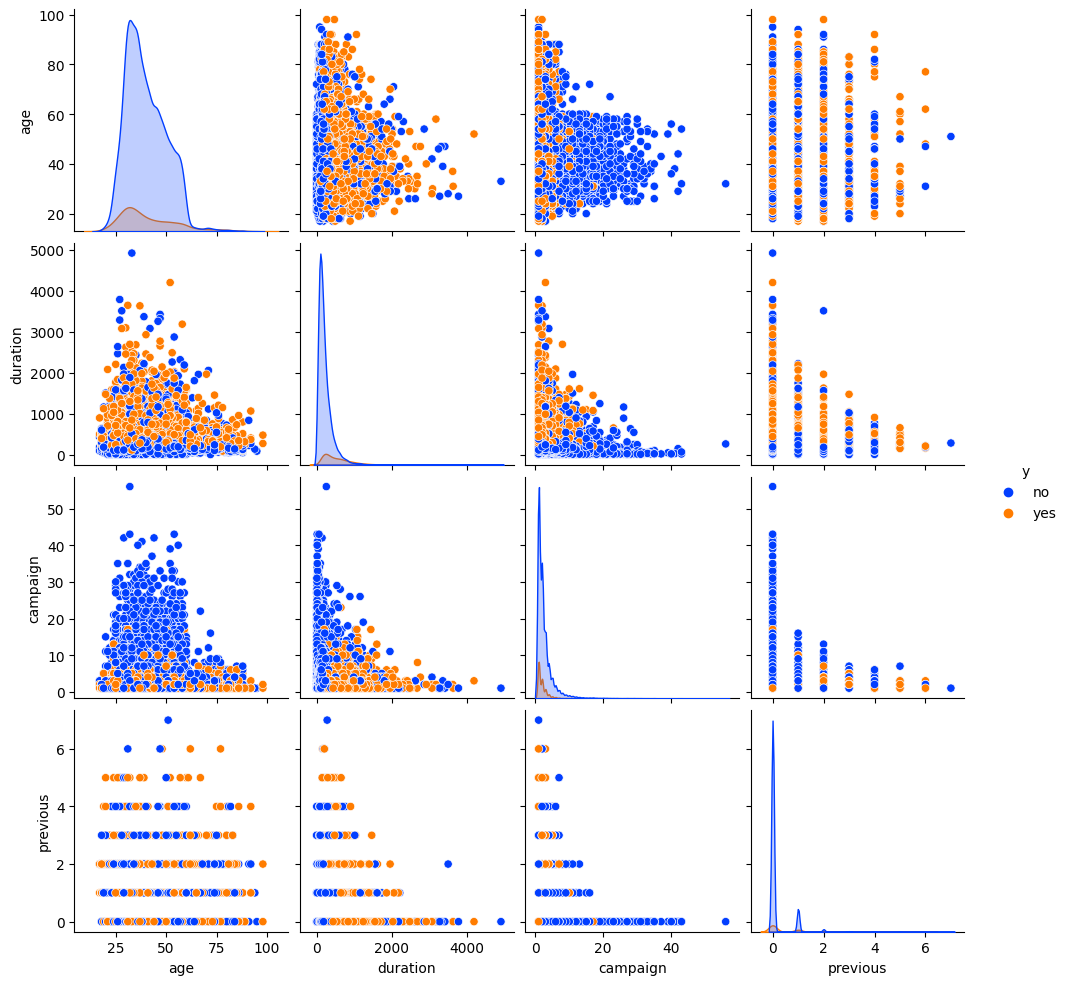

In [64]:
# create pairplot between campaign columns
plot_data = bank_data[campaign_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")

most of the successful marketing campaigns were with newly contacted customers (campaign vs previous plot), 
while a substantial peak is present for customers who were contacted the second 
time, but without success.

E:\projects\Bank_marketing_campaign\bank_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

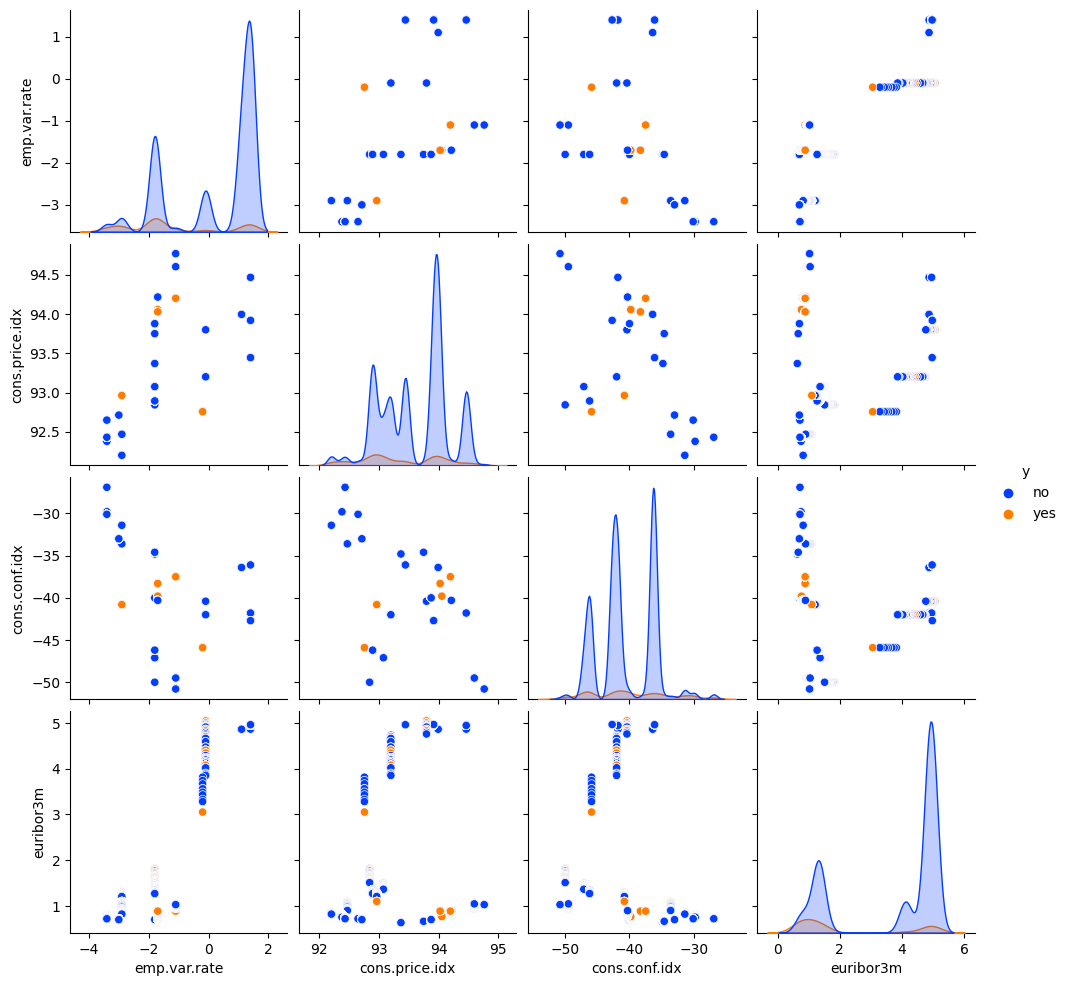

In [68]:
plot_data = bank_data[financial_columns + ["y"]]
plt.figure(figsize=(10,10))
sns.pairplot(plot_data, hue="y", palette="bright")

Interestingly, for lower values for the 3-month interest rates (the euribor3m
column), the number of successful marketing calls is larger than the number of 
unsuccessful ones. The inverse situation happens when interest rates are higher. A 
possible explanation for this phenomenon is customer optimism when interest rates 
are lower.

## Analyze the correlation between features

In [75]:
# create mask for successful calls
successful_calls = bank_data.y == "yes"
# plot correlation matrix for successful calls
plot_data = bank_data[campaign_columns + financial_columns]\
                     [successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,-0.059319,-0.007920,0.074937,-0.081579,-0.024695,0.141166,-0.085403
duration,-0.059319,1.000000,0.156859,-0.231527,0.503056,0.237558,-0.143827,0.499710
campaign,-0.007920,0.156859,1.000000,-0.104093,0.221760,0.116511,-0.042858,0.211863
previous,0.074937,-0.231527,-0.104093,1.000000,-0.284754,0.091215,0.127833,-0.391993
emp.var.rate,-0.081579,0.503056,0.221760,-0.284754,1.000000,0.660341,-0.267241,0.926117
cons.price.idx,-0.024695,0.237558,0.116511,0.091215,0.660341,1.000000,-0.328344,0.414585
cons.conf.idx,0.141166,-0.143827,-0.042858,0.127833,-0.267241,-0.328344,1.000000,-0.120171
euribor3m,-0.085403,0.499710,0.211863,-0.391993,0.926117,0.414585,-0.120171,1.000000


In [74]:
# plot correlation matrix for unsuccessful calls
plot_data = bank_data[campaign_columns + financial_columns]\
                     [~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,0.000803,0.008376,-0.003035,0.026783,0.011444,0.124678,0.041400
duration,0.000803,1.000000,-0.083308,-0.004271,0.003485,0.017708,0.004219,0.006484
campaign,0.008376,-0.083308,1.000000,-0.067808,0.132845,0.123263,-0.007145,0.115355
previous,-0.003035,-0.004271,-0.067808,1.000000,-0.424785,-0.271909,-0.139020,-0.442356
emp.var.rate,0.026783,0.003485,0.132845,-0.424785,1.000000,0.797180,0.319209,0.975955
cons.price.idx,0.011444,0.017708,0.123263,-0.271909,0.797180,1.000000,0.152283,0.730782
cons.conf.idx,0.124678,0.004219,-0.007145,-0.139020,0.319209,0.152283,1.000000,0.393143
euribor3m,0.041400,0.006484,0.115355,-0.442356,0.975955,0.730782,0.393143,1.000000


As we can observe from the preceding two figures, the correlation between 
euribor3m and emp.var.rate is very high (approximately 0.93 for successful and 
0.98 for unsuccessful calls)

In [77]:
diff_corr = successful_corr - unsuccessful_corr
diff_corr.style.background_gradient(cmap='coolwarm')

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,0.000000,-0.060122,-0.016297,0.077972,-0.108362,-0.036139,0.016488,-0.126803
duration,-0.060122,0.000000,0.240167,-0.227256,0.499571,0.219850,-0.148046,0.493226
campaign,-0.016297,0.240167,0.000000,-0.036285,0.088915,-0.006752,-0.035714,0.096508
previous,0.077972,-0.227256,-0.036285,0.000000,0.140031,0.363124,0.266853,0.050364
emp.var.rate,-0.108362,0.499571,0.088915,0.140031,0.000000,-0.136839,-0.586449,-0.049838
cons.price.idx,-0.036139,0.219850,-0.006752,0.363124,-0.136839,0.000000,-0.480627,-0.316198
cons.conf.idx,0.016488,-0.148046,-0.035714,0.266853,-0.586449,-0.480627,0.000000,-0.513314
euribor3m,-0.126803,0.493226,0.096508,0.050364,-0.049838,-0.316198,-0.513314,0.000000


## Modeling the relationship via logistic regression

### how cci gets affected by euribor3m , cpi , evr

In [80]:
import statsmodels.api as sm

In [81]:
X = bank_data[["emp.var.rate", "cons.price.idx", "euribor3m"]]

In [83]:
X = sm.add_constant(X)

In [84]:
y = bank_data["cons.conf.idx"]
# define and fit model
lineare_regression_model = sm.OLS(y, X)
result = lineare_regression_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          cons.conf.idx   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:00:04   Log-Likelihood:            -1.1753e+05
No. Observations:               41188   AIC:                         2.351e+05
Df Residuals:                   41184   BIC:                         2.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -82.4025      5.999    -13.

### conclusion
As we can see in the coeff column; the cons.conf.idx value will increase by 4.3582, 
if the value of the euribor3m is increased by 1, while it will decrease by 4.1814 at 
any increase of emp.var.rate. This means that cons.conf.idx is positively 
correlated with the cons.price.idx and euribor3m columns, and negatively 
correlated with emp.var.rate

## Create a Logistic Regression to fit commercial data to the target y

In [86]:
# create feature matrix and target variable
X = bank_data[["age", "duration", "campaign", "previous"]]
# add constant value for the intercept term
X = sm.add_constant(X)
# target has to be numeric
y = np.where(bank_data["y"] == "yes", 1, 0)
# define and fit model
logistic_regression_model = sm.Logit(y, X)
result = logistic_regression_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.269969
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41183
Method:                           MLE   Df Model:                            4
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                  0.2331
Time:                        11:18:05   Log-Likelihood:                -11119.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7793      0.076    -49.435      0.000      -3.929      -3.629
age            0.0091      0.

In [93]:
#preparing features to be fitted into the logistic model
X = bank_data.drop("y" , axis=1)
X = pd.get_dummies(X)
X = sm.add_constant(X)
X.head()

,const,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.0,56,261,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
1,1.0,57,149,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
2,1.0,37,226,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
3,1.0,40,151,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False
4,1.0,56,307,1,999,0,1.1,93.994,-36.4,4.857,...,False,False,False,True,False,False,False,False,True,False


In [104]:
X= X.apply(lambda x: x.astype(float))

In [105]:
# extract and transform target variable
y = np.where(bank_data["y"] == "yes", 1 ,0)

In [106]:
# define and fit model
full_logistic_regression_model = sm.Logit(y, X)
result = full_logistic_regression_model.fit(maxiter=500)
print(result.summary())

         Current function value: 0.207316
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41135
Method:                           MLE   Df Model:                           52
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                  0.4111
Time:                        11:34:33   Log-Likelihood:                -8538.9
converged:                      False   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -67.6415   6.54e+05     -0.000      1.000   -1.28e+06    1.28e+06
age    

E:\projects\Bank_marketing_campaign\bank_env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Conclusion 
we have lots of redundant columns in our model. 
Furthermore, for some of the coefficients, we cannot even compute the p-values (in 
fact, there is a lot of NaN present in the result, indicating that the optimization model 
running on the back of the Logit.fit() function is not able to converge, which is 
another reason to reduce the number of features)

# Creating a Leaner Logistic Regression model

In [110]:
##selecting features with p-values less than 0.05
selected_features = ["campaign" , "pdays" , "emp.var.rate" , "cons.price.idx" ,"cons.conf.idx" , "euribor3m","nr.employed"]

In [112]:
X = bank_data[selected_features]
X = sm.add_constant(X)

In [113]:
y = np.where(bank_data["y"] == "yes" , 1 , 0)

In [114]:
# define and fit model
lean_lr_model = sm.Logit(y, X)
result = lean_lr_model.fit(maxiter=500)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.288043
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41180
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Aug 2023   Pseudo R-squ.:                  0.1818
Time:                        11:45:59   Log-Likelihood:                -11864.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -25.3361     13.282     -1.908      0.056     -51.368       0.696
campaign         

# Conclusion 
The model is now more optimized and clear. As COFF suggests, the customer response is negatively related to EMP.VAR.RATE that mean the fewer people hired the more the bank campaigns are expected to be successful. Also, a strong positive relationship exists between CPI and the campaign results that means the more customers pay for their basket needs the more they are prone to accept the bank campaigns.